In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from keras.models import Sequential
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

IMAGE_SIZE=224
BATCH_SIZE=32

In [2]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Test",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 416 files belonging to 2 classes.
Found 134 files belonging to 2 classes.


(32, 224, 224, 3)
[0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0]


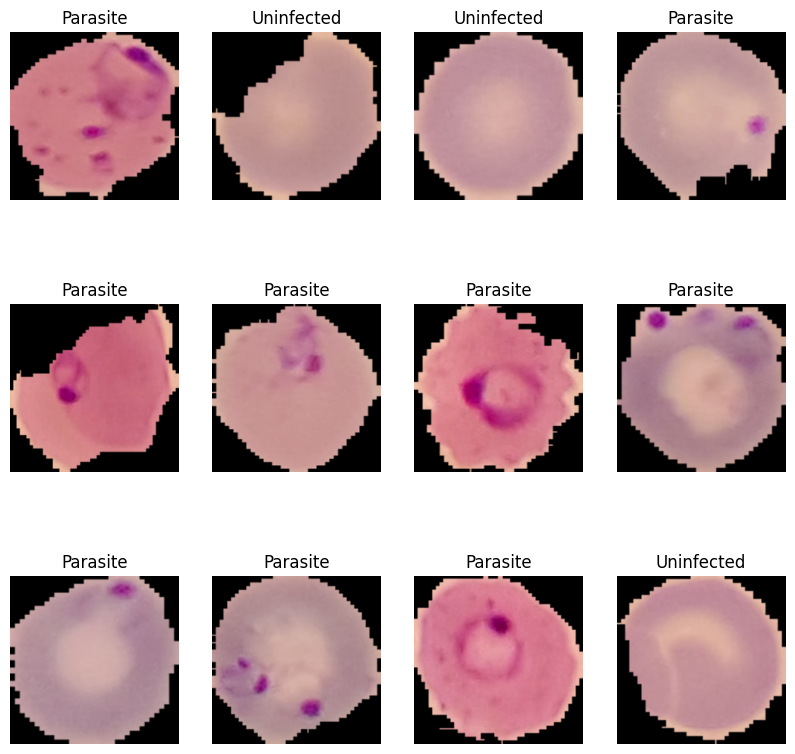

In [3]:
image_folders=train_ds.class_names
image_folders

for image_batch,labels_batch in train_ds.take(1):
    print (image_batch.shape)
    print (labels_batch.numpy())

plt.figure(figsize=(10,10))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(image_folders[labels_batch[i]])
        plt.axis("off")
plt.show()

In [4]:

len(train_ds)

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
])

In [5]:

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

for image_batch,labels_batch in train_ds.take(1):
    print(image_batch[0].numpy())

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 2

[[[ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]
  ...
  [ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]]

 [[ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]
  ...
  [ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]]

 [[ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]
  ...
  [ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]]

 ...

 [[218.8456   177.99043  189.41922 ]
  [219.69055  179.61546  190.6542  ]
  [221.79712  181.83154  192.81554 ]
  ...
  [ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]
  [ 44.84749   44.768227  44.782005]]

 [[220.05324  178.76083  190.4076  ]
  [220.79007  180.47156  191.63196 ]


In [6]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

model.summary()

C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 52, 52, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 10, 10, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 3, 3, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 2)                     │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,394 (669.51 KB)

 Trainable params: 171,394 (669.51 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',
    loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [8]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=test_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5049 - loss: 0.6973 - val_accuracy: 0.6791 - val_loss: 0.6869
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5549 - loss: 0.6918 - val_accuracy: 0.6791 - val_loss: 0.6854
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5610 - loss: 0.6891 - val_accuracy: 0.6791 - val_loss: 0.6721
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5083 - loss: 0.6251 - val_accuracy: 0.6791 - val_loss: 0.4030
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7912 - loss: 0.4149 - val_accuracy: 0.8731 - val_loss: 0.3377
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9557 - loss: 0.4035 - val_accuracy: 0.6940 - val_loss: 0.4783
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8857 - loss: 0.3147 - val_accuracy: 0.8134 - val_loss: 0.5169
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9100 - loss: 0.2731 - val_accuracy: 0.8433 - val_loss:

In [9]:
scores=model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.9297 - loss: 0.1693


In [10]:
scores

[0.16153961420059204, 0.9328358173370361]

In [11]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 13}

In [12]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

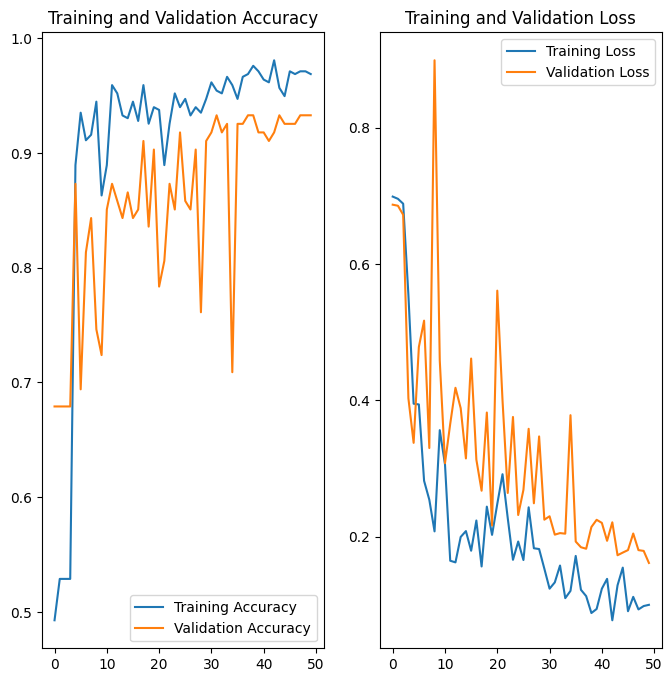

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS=50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
Actual Label: Uninfected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
predicted label: Uninfected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


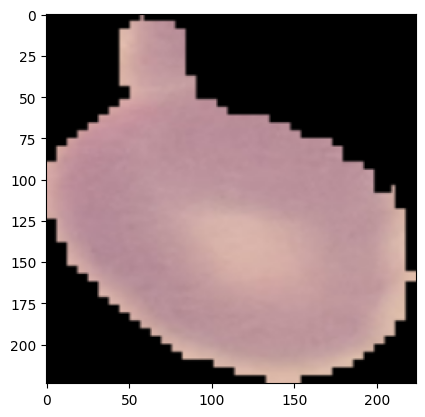

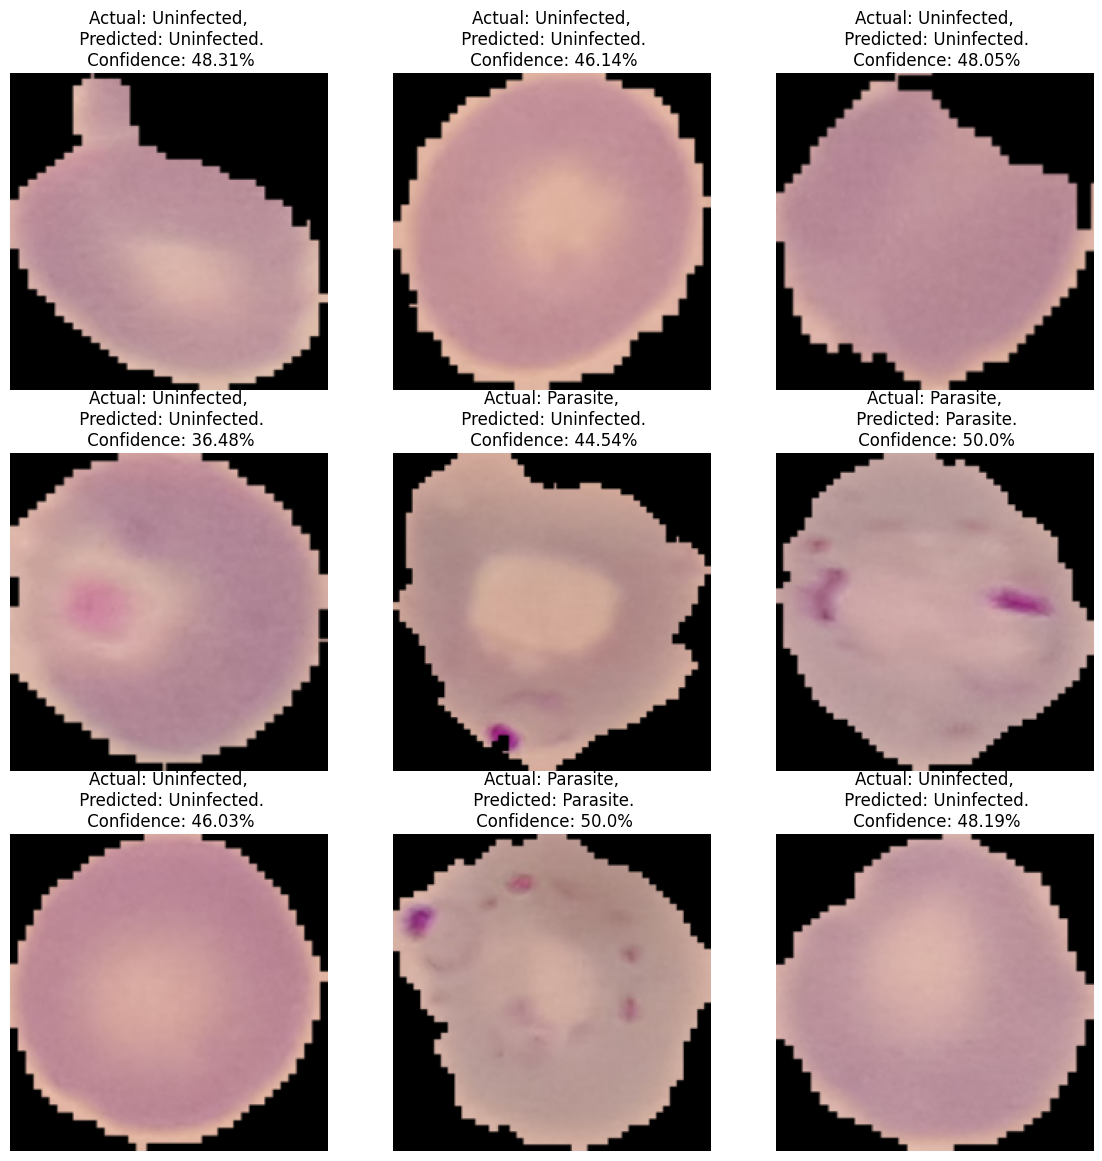

In [17]:


import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    print("first image to predict")
    plt.imshow(first_image)
    print("Actual Label:",image_folders[labels_batch[0].numpy()])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",image_folders[np.argmax(batch_prediction[0])])

def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = image_folders[np.argmax(predictions[0])]
    confidence = round(50 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(14,14))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = image_folders[labels[i]] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")


In [19]:
model.save("Malaria Model.keras")
